<a href="https://colab.research.google.com/github/haiyuhuang177/Monte-Carlo-Simulation/blob/main/Monte_Carlo_for_pi_and_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import random
import numpy as np
def monte_carlo_pi(num_samples):
    inside_circle = 0
    rng = np.random.default_rng(seed = 1234)
    x = rng.uniform(0, 1, num_samples)
    y = rng.uniform(0, 1, num_samples)
    inside_circle = np.sum(x**2 + y**2 <= 1)

    pi_estimate = (inside_circle / num_samples) * 4
    return pi_estimate

# Example usage
num_samples = 10000000
pi_estimate = monte_carlo_pi(num_samples)
print(f"Estimated value of π with {num_samples} samples: {pi_estimate}")

Estimated value of π with 10000000 samples: 3.140638


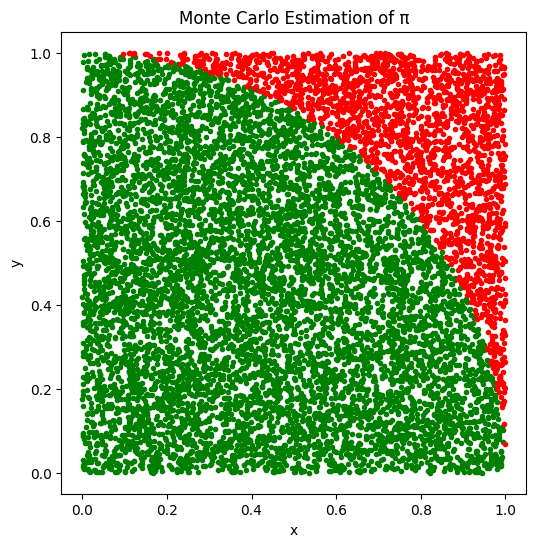

In [15]:
import random
import matplotlib.pyplot as plt

def visualize_monte_carlo_pi(num_samples):
    rng = np.random.default_rng(seed = 12345)
    x = rng.uniform(0, 1, num_samples)
    y = rng.uniform(0, 1, num_samples)
    inside_mask = x**2 + y**2 <= 1
    inside_x = x[inside_mask]
    inside_y = y[inside_mask]
    outside_x = x[~inside_mask]
    outside_y = y[~inside_mask]
    plt.figure(figsize=(6, 6))
    plt.scatter(inside_x, inside_y, color='green', marker='.')
    plt.scatter(outside_x, outside_y, color='red', marker='.')
    plt.title('Monte Carlo Estimation of π')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Example usage
visualize_monte_carlo_pi(10000)

Let $$I(x) = \inf\{i: X_1 + ... + X_i > x\}$$ and define $g(x) = E[I(x)]$. Assume $X_1, X_2, ...$ are i.i.d. Uniform (0,1). For $x \le 1$, $g(x) = e^x$.  For $1 < x \le 2$, $$g(x) = e^x ( 1 - (x-1) e^{-1} ).$$ For $2 < x <=3$, $$g(x) = e^x(1 - e^{-1}(x-1) + e^{-2}(x-2)^2 /2).$$ In general, the formula for $x > 0$ is given by  $$g(x) =\sum_{k=0}^{\lfloor x \rfloor} (-1)^k \frac{(x-k)^k}{k!}  e^{x-k}.$$  
As $x \to \infty$, $g(x)$ approaches $2x + \frac{2}{3}$ asymptotically.
```



In [32]:
import random
def estimate_e(num_trials, x):
    total_draws = 0
    rng = np.random.default_rng(seed = 12345)
    for _ in range(num_trials):
        sum_random_numbers = 0
        draws = 0

        while sum_random_numbers <= x:
            sum_random_numbers += rng.uniform(0, 1)
            draws += 1

        total_draws += draws

    e_estimate = total_draws / num_trials
    return e_estimate

# Example usage
num_trials = 1000000
x = 1
e_estimate = estimate_e(num_trials, x)
print(f"Estimated value of g(x) with {num_trials} trials: {e_estimate}")
#print(f"Actual value of g(x), 0 < x <= 1: {np.exp(x)}")
#print(f"Actual value of g(x), 1 <= x < 2: {np.exp(x) * (1- (x-1) * np.exp(-1))}")
#print(f"Actual value of g(x), 1 <= x < 2: {np.exp(x) * (1- (x-1) * np.exp(-1) + (x-2)**2 * np.exp(-2) /2)}")

Estimated value of g(x) with 1000000 trials: 2.717851
